# MODIS Analysis

Moderate Resolution Imaging Spectroradiometer (MODIS) is one of the NASA’s instruments aboard the Terra and Aqua satellites. Terra's orbit around the Earth is timed so that it passes from north to south across the equator in the morning, while Aqua passes south to north over the equator in the afternoon. Terra MODIS and Aqua MODIS are viewing the entire Earth's surface every 1 to 2 days, acquiring data in 36 spectral bands, or groups of wavelengths. Some of the spectral bands are used to retrieve atmospheric parameters. Integrated data at 3 km resolution (originally from 250m resolution images) are listed in the files near/over ARM SGP sites.   

---

### Image and/or data files provided:

- MYD04_3K.A*.hdf
- UW_course_all_data.dat

### Data columns in [UW_course_all_data.dat]:
- year_fr
- year
- month
- day
- lat
- lon
- aod
- aodr
- CF
- Ref1-Ref7

**Ref1-Ref7 = Mean reflectance of pixels used for land retrieval at 0.47, 0.55, 0.65, 0.86, 1.24, 1.63, 2.11 microns***




In [36]:
import pandas as pd
import numpy as np
import xarray as xr
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc

import cartopy.crs as ccrs
import cartopy.feature as cfeature

sns.set_style('ticks')
%config InlineBackend.figure_format='retina'

### Exercise:

- Can you open any of the hdf file(s) for different passes/times.
- Get familiar to the fields from these data files
- Try to plot/map some of the important fields from a given day/time.

In [27]:
data = nc.Dataset('MYD04_3K.A2012100.1835.061.2018039151914.hdf'); # Opening a HDF file

In [32]:
files = glob('UW_course_data_MYD*.dat')
data = pd.DataFrame()

for fn in files:
    data_i = pd.read_table(fn, delimiter = '\s+', header = None, engine = 'python',names = ['year_fr', 'year', 'month', 'day', 'lat', 'lon', 
                                      'aod', 'aodr', 'CF', 'ref1', 'ref2', 'ref3', 'ref4', 'ref5',
                                     'ref6', 'ref7'])
    data = pd.concat([data, data_i])
data

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_69603/1330580588.py:5: SyntaxWarning: invalid escape sequence '\s'
  data_i = pd.read_table(fn, delimiter = '\s+', header = None, engine = 'python',names = ['year_fr', 'year', 'month', 'day', 'lat', 'lon',


year_fr    year  month    day        lat         lon    aod  aodr  \
0     2003.274  2003.0    4.0  100.0  42.926006  -92.461380  0.322   0.0   
1     2003.274  2003.0    4.0  100.0  42.997688  -92.472351  0.370   0.0   
2     2003.274  2003.0    4.0  100.0  43.012310  -92.477173  0.412   0.0   
3     2003.274  2003.0    4.0  100.0  43.066502  -92.478897  0.371   0.0   
4     2003.274  2003.0    4.0  100.0  30.245707  -92.292328  0.262   0.0   
...        ...     ...    ...    ...        ...         ...    ...   ...   
3046  2009.274  2009.0    4.0  100.0  32.988033 -110.554180  0.290   0.0   
3047  2009.274  2009.0    4.0  100.0  32.896046 -111.189670  0.231   0.0   
3048  2009.274  2009.0    4.0  100.0  32.704147 -112.269200  0.331   0.0   
3049  2009.274  2009.0    4.0  100.0  32.654728 -112.329250  0.257   0.0   
3050  2009.274  2009.0    4.0  100.0  32.597637 -112.394490  0.222   0.0   

         CF    ref1    ref2    ref3    ref4    ref5    ref6    ref7  
0     0.222  0.2618  0.2198  0.2052  0.2708  0.3474  0.3354  0.2436  
1     0.166  0.2626  0.2201  0.2062  0.2834  0.3390  0.3251  0.2264  
2     0.055  0.2651  0.2219  0.2107  0.2879  0.3457  0.3334  0.2218  
3     0.027  0.2642  0.2214  0.2087  0.2791  0.3540  0.3485  0.2347  
4     0.111  0.2027  0.1759  0.1349  0.3340  0.3269  0.2397  0.1181  
...     ...     ...     ...     ...     ...     ...     ...     ...  
3046  0.333  0.1218  0.1129  0.1192  0.1692  0.2042  0.1883  0.1389  
3047  0.333  0.1348  0.1313  0.1442  0.2133  0.2867  0.2894  0.2035  
3048  0.055  0.1473  0.1445  0.1623  0.2085  0.2463  0.2298  0.1947  
3049  0.138  0.1383  0.1281  0.1384  0.1901  0.2430  0.2246  0.1826  
3050  0.333  0.1216  0.1037  0.1005  0.1347  0.1641  0.1526  0.1143  

[33769 rows x 16 columns]

In [5]:
data = pd.read_table('UW_course_all_data.dat', delimiter = '\s+', header = None, engine = 'python',
                     names = ['year_fr', 'year', 'month', 'day', 'lat', 'lon', 
                                      'aod', 'aodr', 'CF', 'ref1', 'ref2', 'ref3', 'ref4', 'ref5',
                                     'ref6', 'ref7'])

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_69603/1149635007.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_table('UW_course_all_data.dat', delimiter = '\s+', header = None, engine = 'python',


In [33]:
data['time'] = pd.to_datetime(data['year'].astype(int).astype(str) + '-' + data['day'].astype(int).astype(str), format = '%Y-%j')

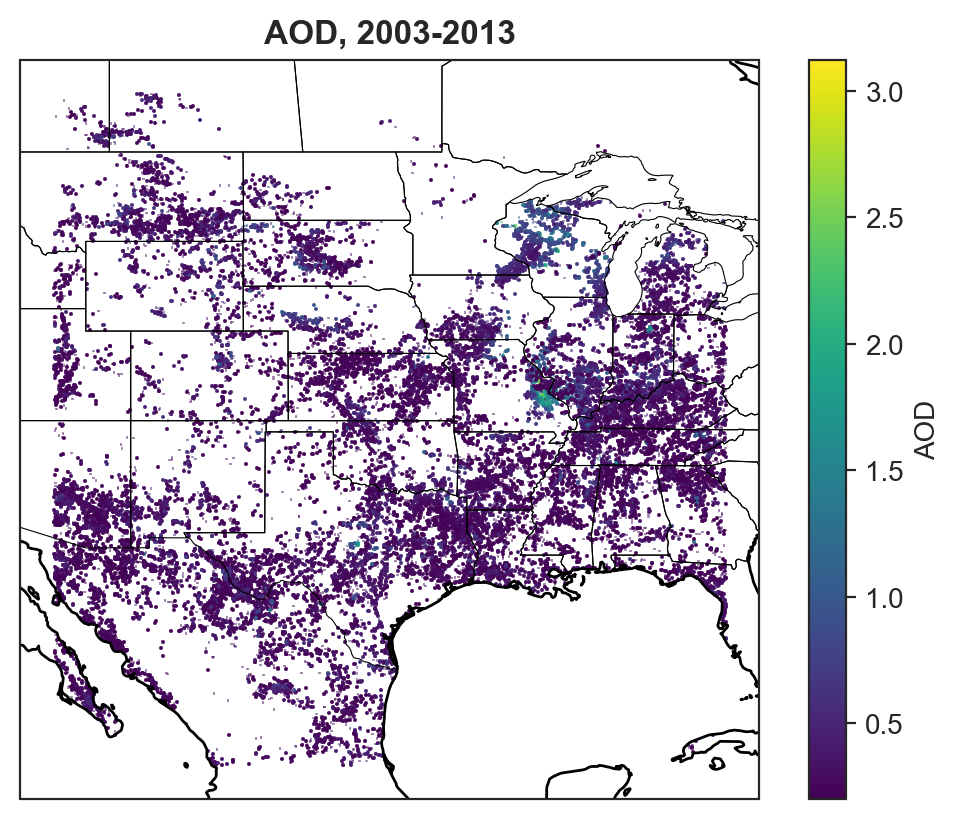

In [45]:
fig = plt.Figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.4)

df_plot = data
im = ax.scatter(df_plot.lon, df_plot.lat, c = df_plot.aod, s = 0.07, transform = ccrs.PlateCarree(),
          cmap = 'viridis', marker = 's')
ax.set_title('AOD, 2003-2013', weight = 'bold')
fig.colorbar(im, label = 'AOD')
plt.show()

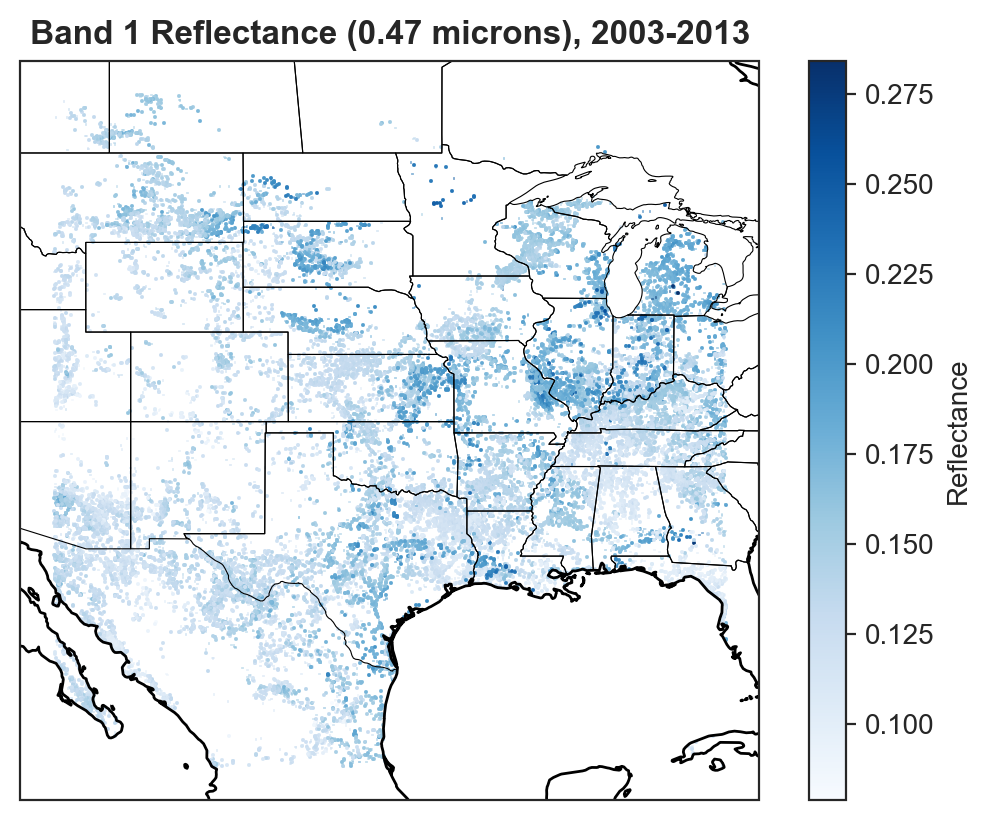

In [84]:
fig = plt.Figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.4)

df_plot = data
im = ax.scatter(df_plot.lon, df_plot.lat, c = df_plot.ref1, s = 0.07, transform = ccrs.PlateCarree(),
          cmap = 'Blues', marker = 's')
ax.set_title('Band 1 Reflectance (0.47 microns), 2003-2013', weight = 'bold')
fig.colorbar(im, label = 'Reflectance')
plt.show()

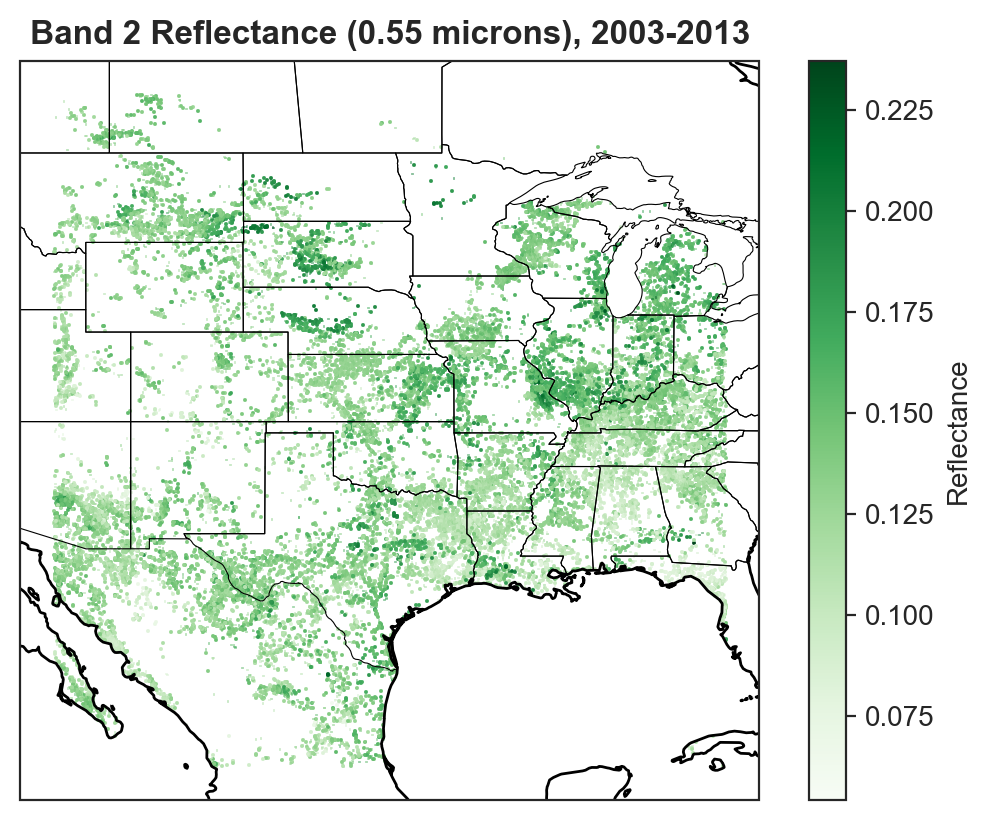

In [85]:
fig = plt.Figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.4)

df_plot = data
im = ax.scatter(df_plot.lon, df_plot.lat, c = df_plot.ref2, s = 0.07, transform = ccrs.PlateCarree(),
          cmap = 'Greens', marker = 's')
ax.set_title('Band 2 Reflectance (0.55 microns), 2003-2013', weight = 'bold')
fig.colorbar(im, label = 'Reflectance')
plt.show()

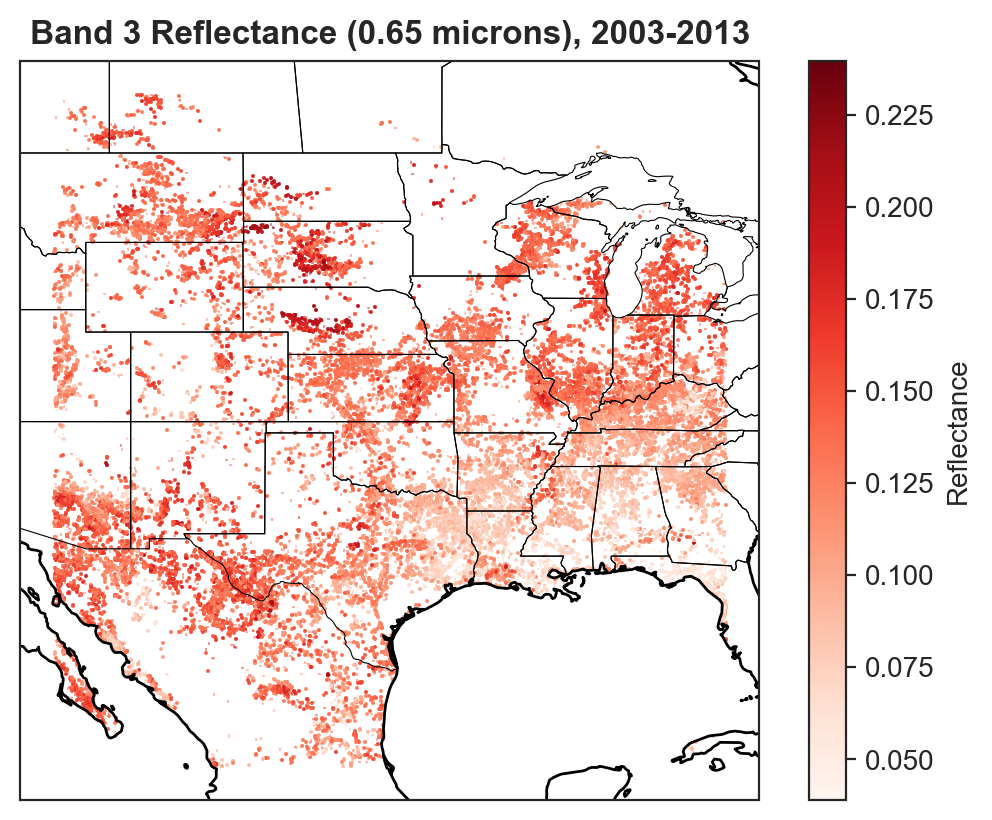

In [86]:
fig = plt.Figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.4)

df_plot = data
im = ax.scatter(df_plot.lon, df_plot.lat, c = df_plot.ref3, s = 0.07, transform = ccrs.PlateCarree(),
          cmap = 'Reds', marker = 's')
ax.set_title('Band 3 Reflectance (0.65 microns), 2003-2013', weight = 'bold')
fig.colorbar(im, label = 'Reflectance')
plt.show()

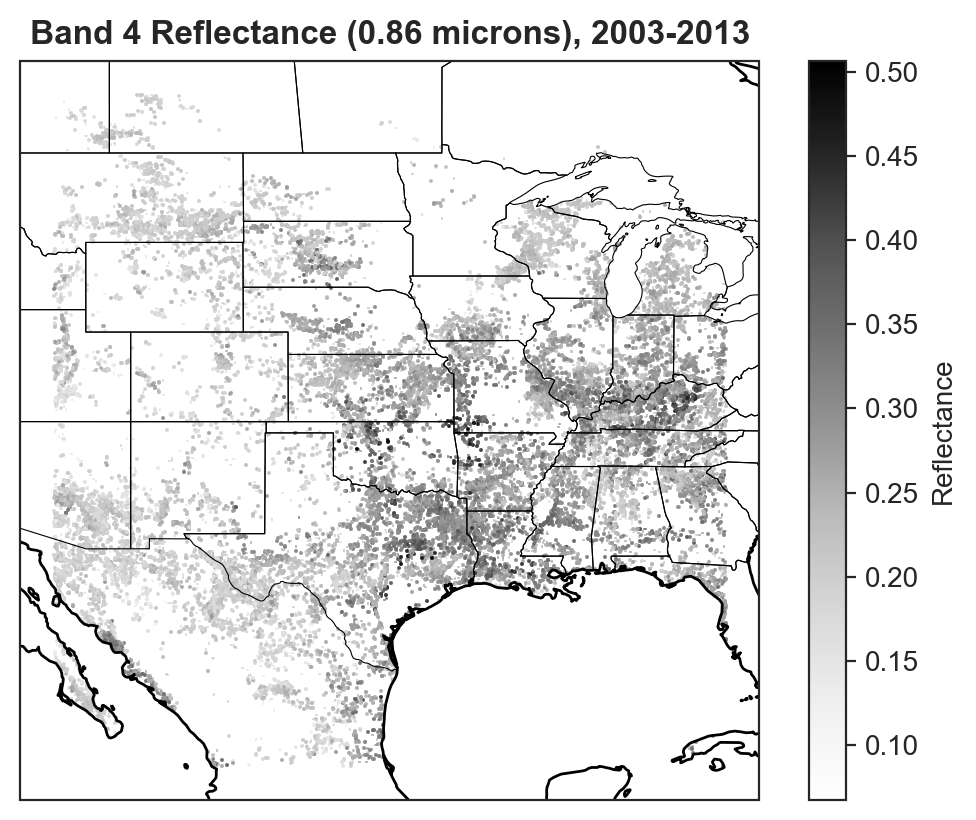

In [94]:
fig = plt.Figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.4)

df_plot = data
im = ax.scatter(df_plot.lon, df_plot.lat, c = df_plot.ref4, s = 0.07, transform = ccrs.PlateCarree(),
          cmap = 'Greys', marker = 's')
ax.set_title('Band 4 Reflectance (0.86 microns), 2003-2013', weight = 'bold')
fig.colorbar(im, label = 'Reflectance')
plt.show()

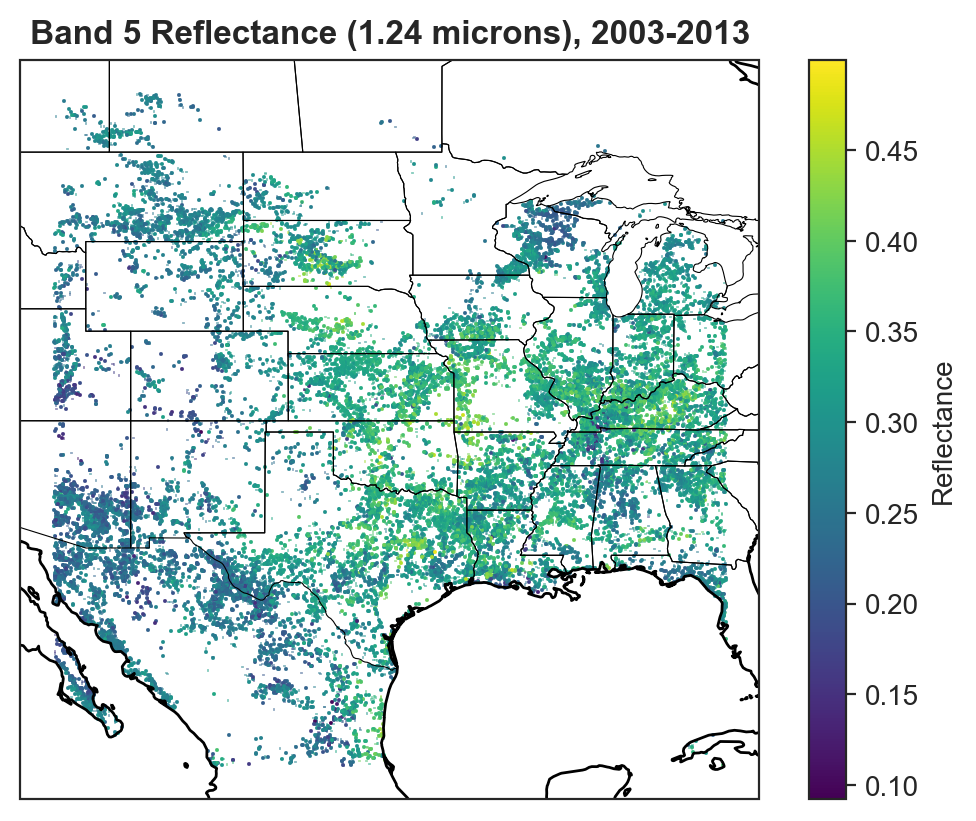

In [93]:
fig = plt.Figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.4)

df_plot = data
im = ax.scatter(df_plot.lon, df_plot.lat, c = df_plot.ref5, s = 0.07, transform = ccrs.PlateCarree(),
          cmap = 'viridis', marker = 's')
ax.set_title('Band 5 Reflectance (1.24 microns), 2003-2013', weight = 'bold')
fig.colorbar(im, label = 'Reflectance')
plt.show()

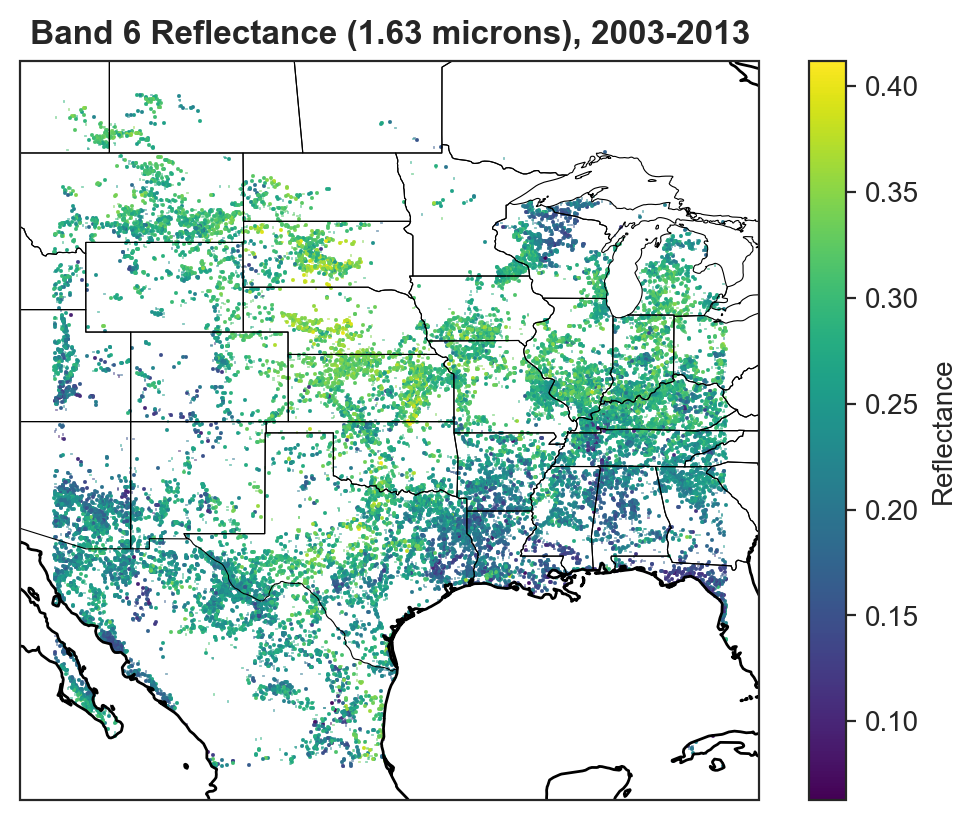

In [89]:
fig = plt.Figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.4)

df_plot = data
im = ax.scatter(df_plot.lon, df_plot.lat, c = df_plot.ref6, s = 0.07, transform = ccrs.PlateCarree(),
          cmap = 'viridis', marker = 's')
ax.set_title('Band 6 Reflectance (1.63 microns), 2003-2013', weight = 'bold')
fig.colorbar(im, label = 'Reflectance')
plt.show()

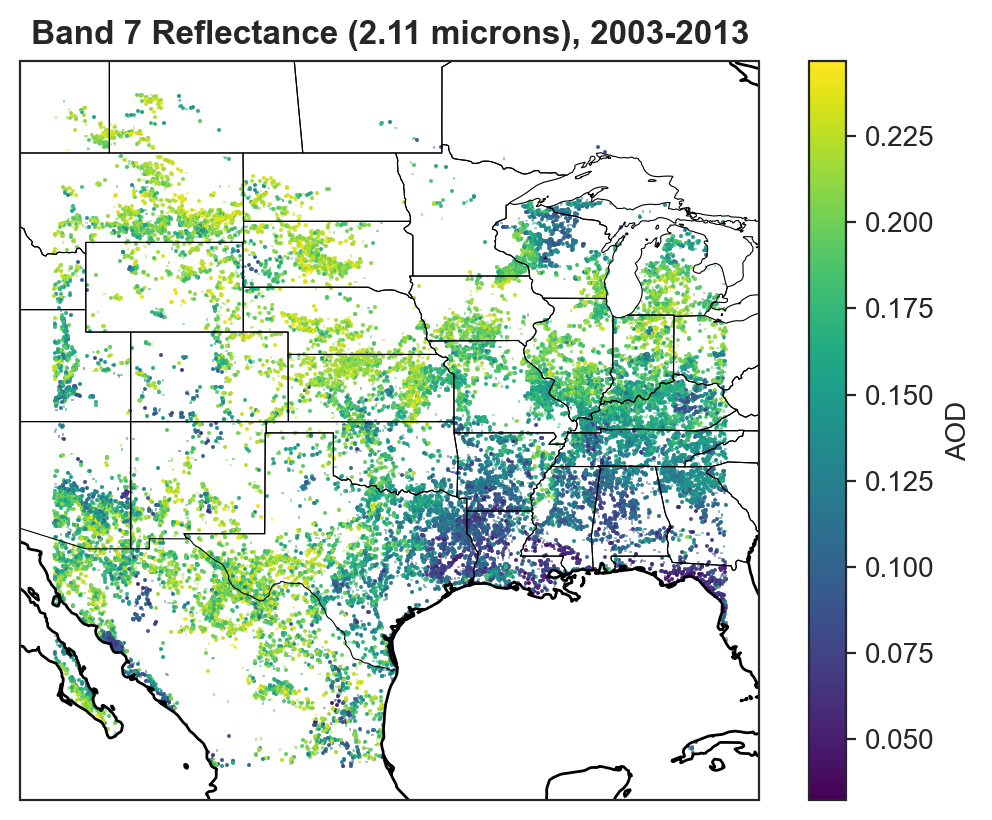

In [58]:
fig = plt.Figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.4)

df_plot = data
im = ax.scatter(df_plot.lon, df_plot.lat, c = df_plot.ref7, s = 0.07, transform = ccrs.PlateCarree(),
          cmap = 'viridis', marker = 's')
ax.set_title('Band 7 Reflectance (2.11 microns), 2003-2013', weight = 'bold')
fig.colorbar(im, label = 'AOD')
plt.show()

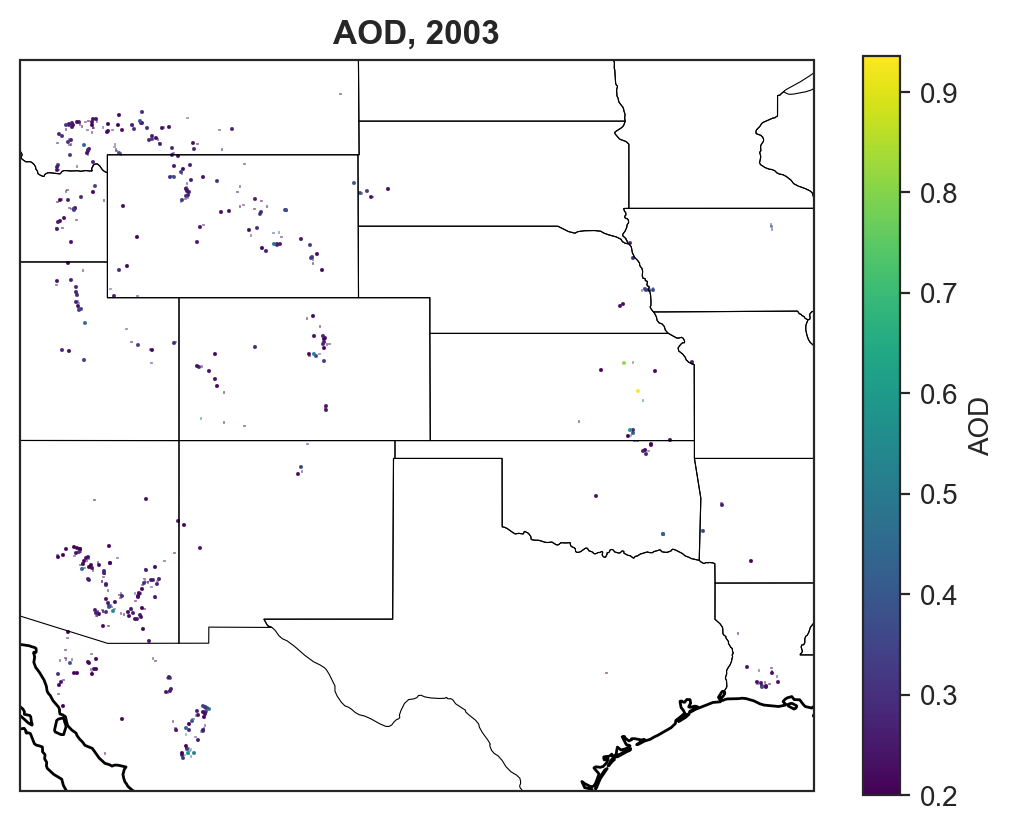

In [48]:
fig = plt.Figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.4)
year = 2003

df_plot = data[data.year == year]
im = ax.scatter(df_plot.lon, df_plot.lat, c = df_plot.aod, s = 0.07, transform = ccrs.PlateCarree(),
          cmap = 'viridis', marker = 's')
ax.set_title(f'AOD, {year}', weight = 'bold')
fig.colorbar(im, label = 'AOD')
plt.show()

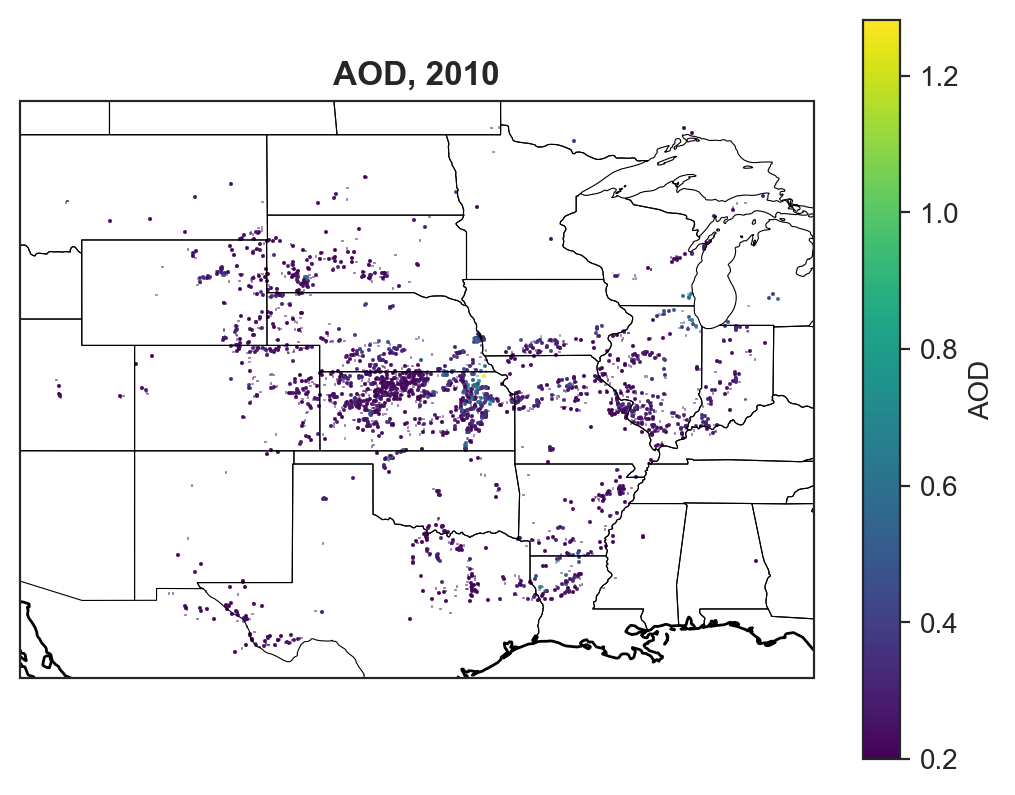

In [51]:
fig = plt.Figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.4)
year = 2010

df_plot = data[data.year == year]
im = ax.scatter(df_plot.lon, df_plot.lat, c = df_plot.aod, s = 0.07, transform = ccrs.PlateCarree(),
          cmap = 'viridis', marker = 's')
ax.set_title(f'AOD, {year}', weight = 'bold')
fig.colorbar(im, label = 'AOD')
plt.show()

### Exercise:

- Try to see if there is a relation in Aerosol and/or Clouds fields 
- Look into the reflectance data, see if the MODIS reflectance are different then the Altum observations. If yes, why?

Text(0, 0.5, 'AOD')

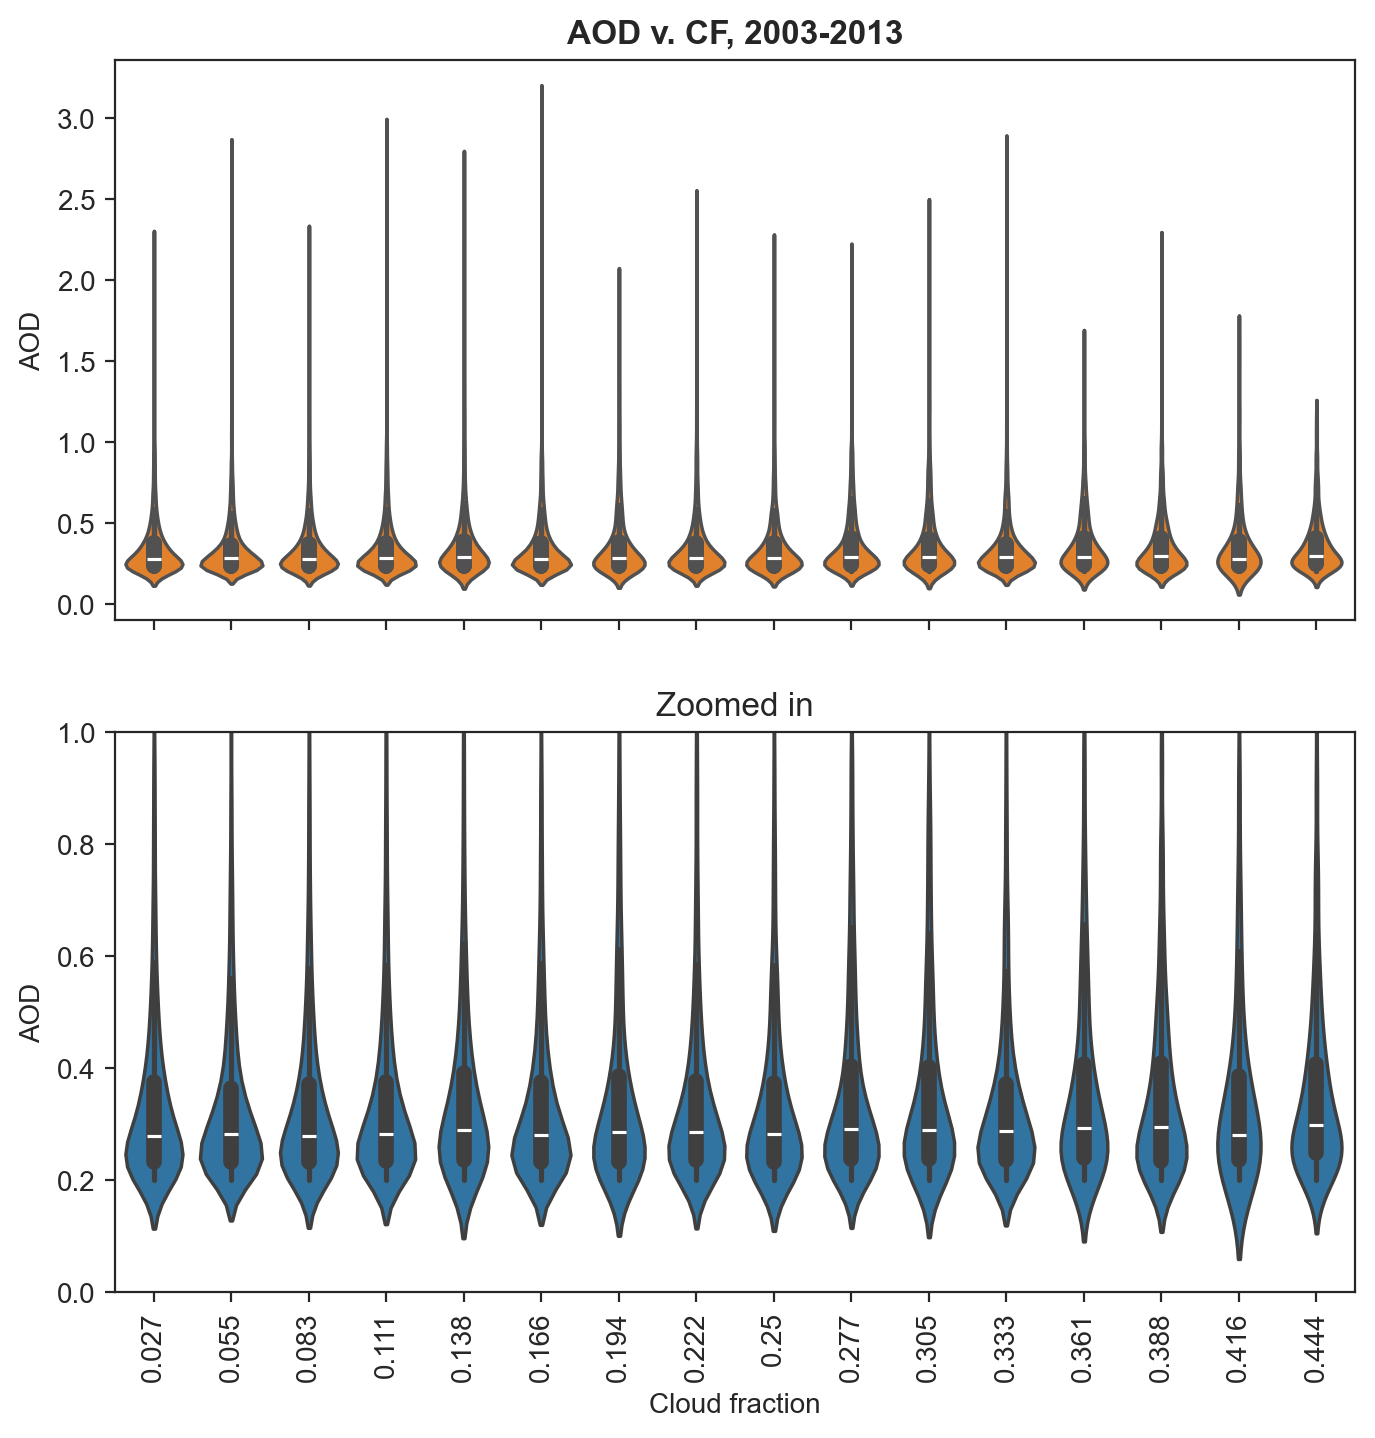

In [79]:
fig, (ax, ax2) = plt.subplots(2,1, figsize = (8,8), sharex = True)

sns.violinplot(data=data, x="CF", y="aod", ax = ax, width=.5)
plt.xticks(rotation = 90);

sns.violinplot(data=data, x="CF", y="aod", ax = ax)
sns.violinplot(data=data, x="CF", y="aod", ax = ax2 )
ax2.set_ylim([0, 1.])

ax.set_title('AOD v. CF, 2003-2013', weight = 'bold')
ax2.set_title('Zoomed in')

ax2.set_xlabel('Cloud fraction')
ax2.set_ylabel('AOD')
ax.set_ylabel('AOD')

Text(0.5, 0, '')

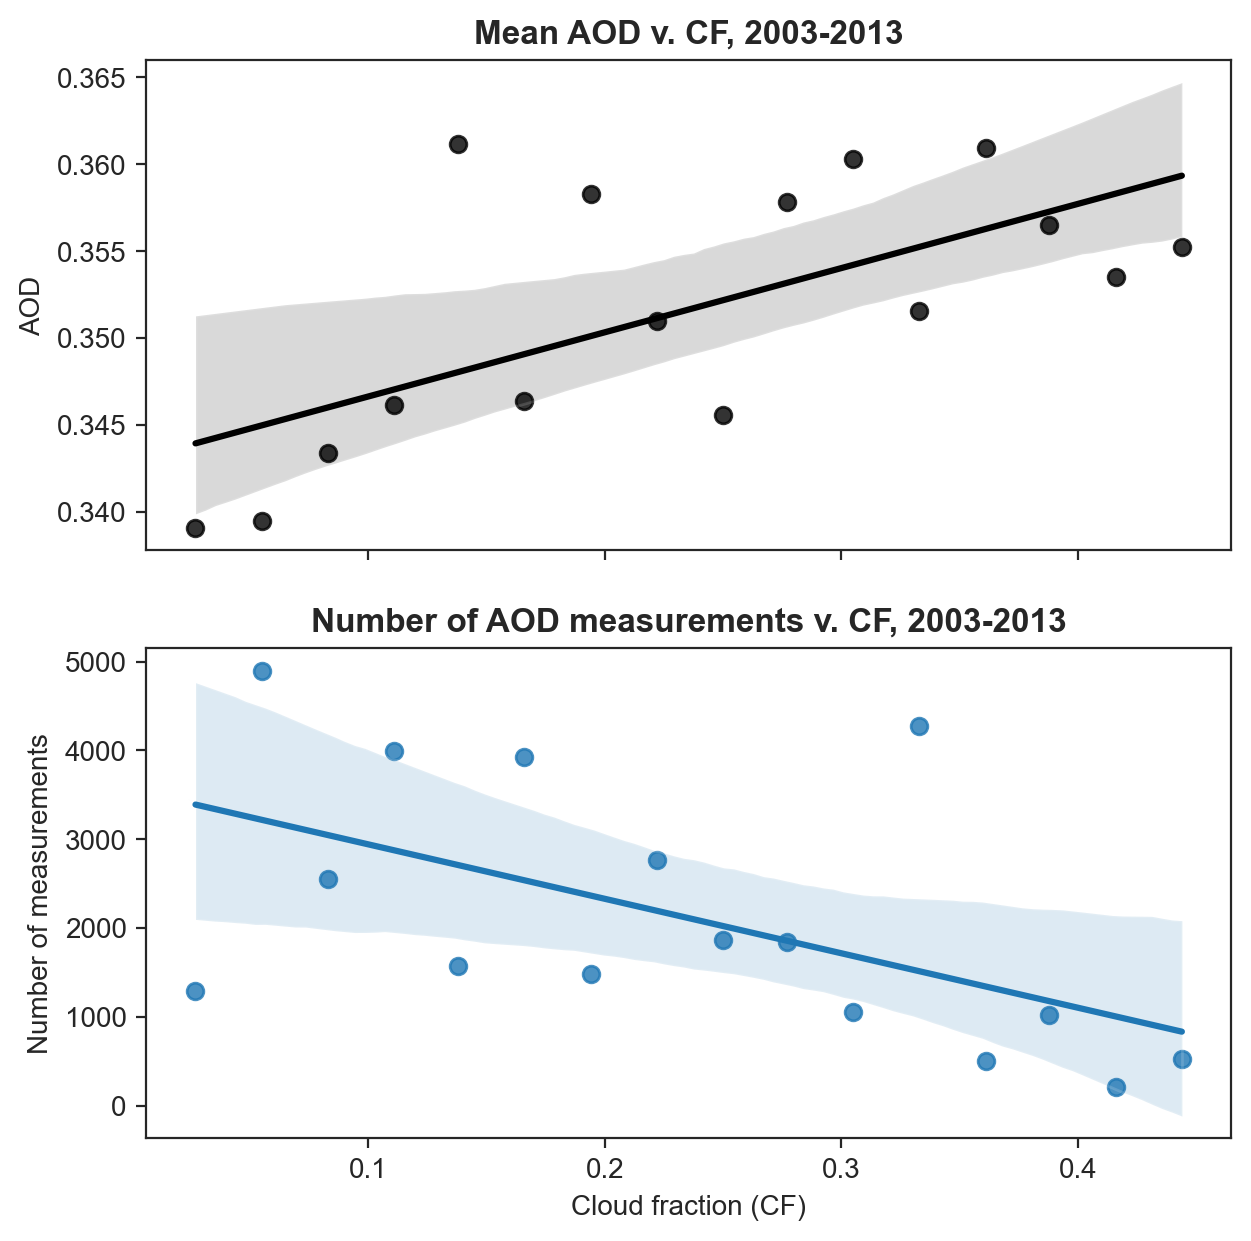

In [133]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = (7,7))

from scipy.stats import linregress

aggr_mean = data.groupby('CF').mean().reset_index()
aggr_std = data.groupby('CF').std().reset_index()
aggr_count = data.groupby('CF').count().reset_index()
sns.regplot(ax = ax1, x = 'CF', y="aod", data=aggr_mean, color = 'black');
sns.regplot(ax = ax2, x = 'CF', y="aod", data=aggr_count);

ax1.set_ylabel('AOD')
ax1.set_title('Mean AOD v. CF, 2003-2013', weight = 'bold')
ax2.set_title('Number of AOD measurements v. CF, 2003-2013', weight = 'bold')

ax2.set_ylabel('Number of measurements')
ax2.set_xlabel('Cloud fraction (CF)')
ax1.set_xlabel('')

## Estimating NDVI

- Like Altum, using MODIS data, estimate the presence of vegetation using Normalized Difference Vegetation Index:

$$ NDVI = \frac{(NIR - R)}{(NIR + R)} $$


In [139]:
data['ndvi'] = (data['ref4'] - data['ref3']) / (data['ref4'] + data['ref3'])
data['nirv'] = data['ndvi'] * data['ref4']
data['ndwi'] = (data['ref2'] - data['ref4']) / (data['ref2'] + data['ref4'])

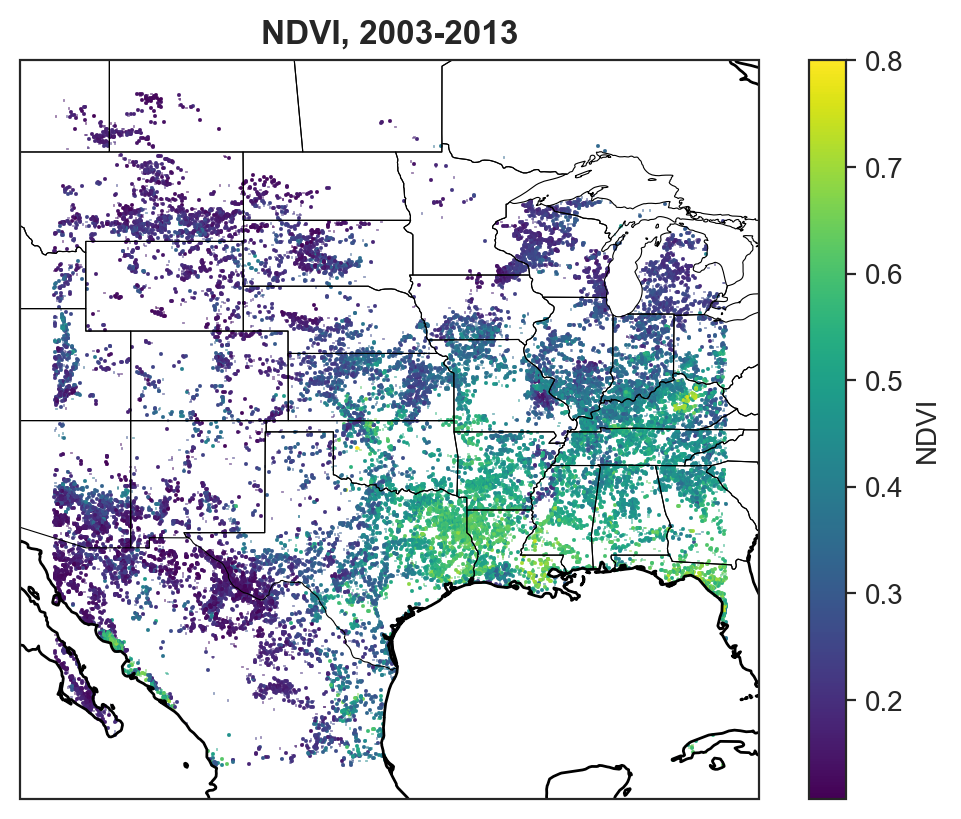

In [138]:
fig = plt.Figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.4)

df_plot = data
im = ax.scatter(df_plot.lon, df_plot.lat, c = df_plot.ndvi, s = 0.07, transform = ccrs.PlateCarree(),
          cmap = 'viridis', marker = 's')
ax.set_title('NDVI, 2003-2013', weight = 'bold')
fig.colorbar(im, label = 'NDVI')
plt.show()

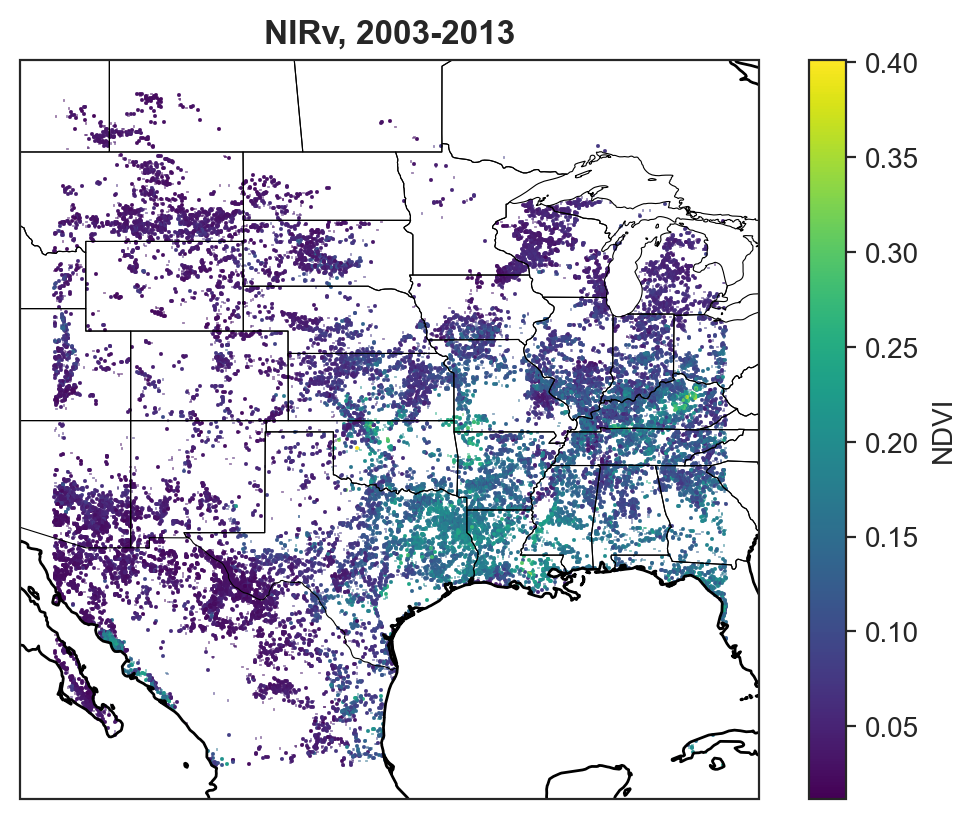

In [140]:
fig = plt.Figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.4)

df_plot = data
im = ax.scatter(df_plot.lon, df_plot.lat, c = df_plot.nirv, s = 0.07, transform = ccrs.PlateCarree(),
          cmap = 'viridis', marker = 's')
ax.set_title('NIRv, 2003-2013', weight = 'bold')
fig.colorbar(im, label = 'NDVI')
plt.show()

Text(0.5, 0, '')

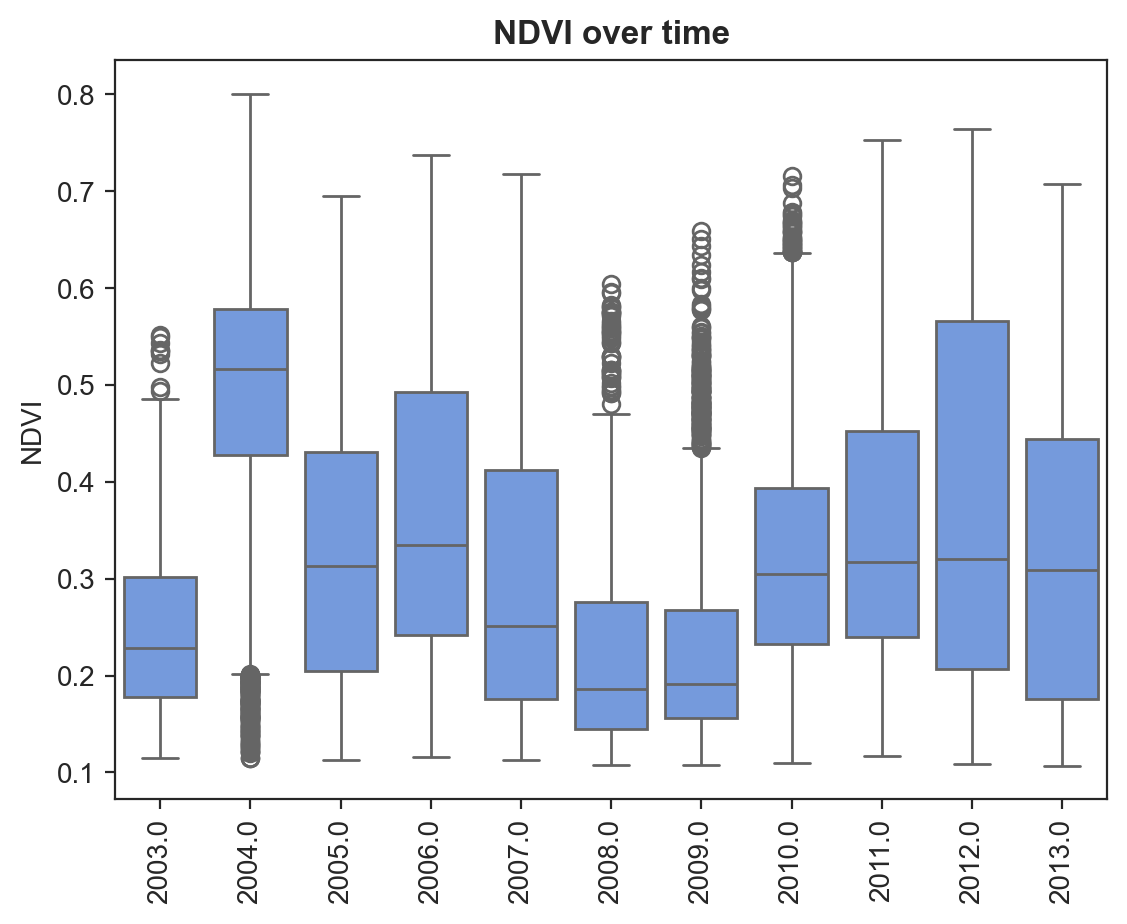

In [153]:
fig, ax = plt.subplots()

sns.boxplot(data = data, x = 'year', y = 'ndvi', color = 'cornflowerblue')
plt.xticks(rotation = 90)
ax.set_title('NDVI over time', weight = 'bold')
ax.set_ylabel('NDVI')
ax.set_xlabel('')